In [36]:
import numpy as np
import matplotlib.pyplot as plt
from lr_utils import load_dataset

import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist #这里是取得准备好的数据集，获取的来源我暂时不知道具体步骤
# 调用load_data方法会得到两个元组，每个元组包含两个列表；存储图形数据和标签值
# (training_images, training_labels), (test_images, test_labels) = mnist.load_data()
train_set_x_orig , train_set_y , test_set_x_orig , test_set_y , classes = load_dataset()

training_images = train_set_x_orig
training_labels = np.squeeze(train_set_y)

test_images = test_set_x_orig
test_labels = np.squeeze(test_set_y)



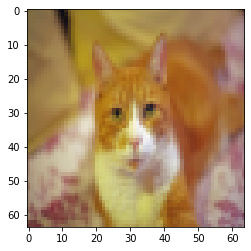

In [37]:
# 打印某个训练图像和训练标签看看
plt.imshow(training_images[24]) # 打印图像

In [38]:

# print(training_labels[0]) #标签值，这里是一个数字
# print(training_images[0]) #这里打印的是一个二维数组，每个值为0~255，我认为算是图形二进制数据

# 出于多种原因，如果把所有的值都处理成0和1之间，那就更容易得到较好的训练效果。这个过程叫做 "归一化"
training_images  = training_images / 255.0
test_images = test_images / 255.0

# 重点，设计这个图片分类的模型
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Sequential   定义了神经网络层的层数序列   （这里个人这样认为，把神经网络想象成一层层，那么这里就规定了每一层都有什么，每一层作为参数传给了Sequential函数）   
# Flatten   把之前那个二维数组变成一维的集合（拍平）    
# Dense     每一层神经元都需要一个激活函数来告诉它们该做什么（这里一个Dense应该就是一层，激活函数有很多种）
# Relu      这里的作用是：如果X>0返回X，否则返回0"它所做的只是将值0或更大的值传递给网络的下一层  
# Softmax   采用一组值，有效地选择最大的值，因此，例如，如果最后一层的输出看起来像[0.1,0.1,0.05,0.1,9.5,0.1,0.05,0.05,0.05]，它可以寻找最大的值，并将其转化为[0,0,0.1,0,0,0,0,0] - 目标是节省大量编码

# 通过设置优化器和损失函数，然后调用model.fit来训练它
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=55)
# 可以从执行的结果看到准确率

# 看看测试的数据的准确率如何，一般会低一点，这时候得通过一些手段提高准确率
model.evaluate(test_images, test_labels)

Epoch 1/55
7/7 [==============================] - 0s 10ms/step - loss: 2.7161 - accuracy: 0.5167
Epoch 2/55
7/7 [==============================] - 0s 13ms/step - loss: 2.6978 - accuracy: 0.5550
Epoch 3/55
7/7 [==============================] - 0s 11ms/step - loss: 3.1158 - accuracy: 0.4928
Epoch 4/55
7/7 [==============================] - 0s 11ms/step - loss: 2.0270 - accuracy: 0.6316
Epoch 5/55
7/7 [==============================] - 0s 12ms/step - loss: 0.6997 - accuracy: 0.7225
Epoch 6/55
7/7 [==============================] - 0s 11ms/step - loss: 0.5966 - accuracy: 0.7464
Epoch 7/55
7/7 [==============================] - 0s 11ms/step - loss: 0.5425 - accuracy: 0.7608
Epoch 8/55
7/7 [==============================] - 0s 11ms/step - loss: 1.1123 - accuracy: 0.6794
Epoch 9/55
7/7 [==============================] - 0s 13ms/step - loss: 0.9458 - accuracy: 0.6842
Epoch 10/55
7/7 [==============================] - 0s 11ms/step - loss: 0.9163 - accuracy: 0.6938
Epoch 11/55
7/7 [============

[1.216726541519165, 0.7599999904632568]